##  Task 2: Prediction using Unsupervised ML

### *Objective*: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

### By: Amitkumar Rautray

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Understanding the Data

In [2]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Filtering NULL values
print("total number of null values = ",iris_df.isnull().sum().sum())

total number of null values =  0


#### Scaling the Data using Standard Scaler

In [5]:
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
std_slc.fit(iris_df)
data_transformed = std_slc.transform(iris_df)
data_transformed[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

#### The Elbow Method:
This is probably the most well-known method for determining the optimal number of clusters. It is also a bit naive in its approach.

#### The Silhouette Method:
The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

In [6]:
# Finding the optimum number of clusters for k-means classification

def plot_comparison():
    plt.style.use("fivethirtyeight")
    fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(10, 4), sharex=False, sharey=False)

    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                        max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(data_transformed)
        wcss.append(kmeans.inertia_)
        
    # Plotting the results onto a line graph, 
    # `allowing us to observe 'The elbow'
    ax1.plot(range(1, 11), wcss, color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=12)
    ax1.set_title('Elbow method')
    ax1.set_xlabel('Number of clusters')
    ax1.set_ylabel('WCSS') # Within cluster sum of squares
    
    
    sil = []
    
    for k in range(2, 10):
        kmeans = KMeans(n_clusters = k).fit(data_transformed)  
        preds = kmeans.fit_predict(data_transformed)
        sil.append(silhouette_score(data_transformed, preds, metric = 'euclidean'))
    
    
    ax2.plot(range(2, 10), sil, color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
    ax2.set_title('Silhouette Method')
    ax2.set_xlabel('Number of clusters')
    ax2.set_ylabel('Sil')
    plt.show()

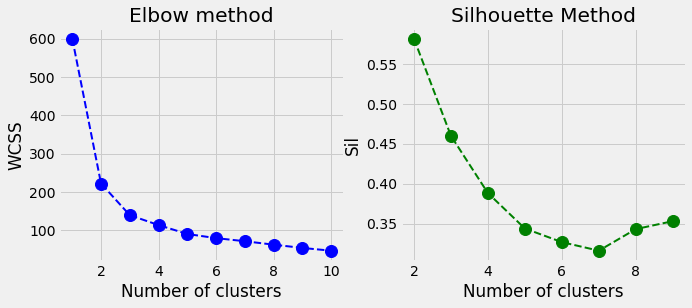

In [7]:
plot_comparison()

From this we choose the number of clusters as **3**.

#### Now lets plot the clusters

In [8]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 47)
y_kmeans = kmeans.fit_predict(data_transformed)

In [11]:
def plot_clusters():
    # Visualising the clusters - On the first two columns
    plt.scatter(data_transformed[y_kmeans == 0, 0], data_transformed[y_kmeans == 0, 1], 
                s = 50, c = 'red', label = 'Iris-setosa')
    plt.scatter(data_transformed[y_kmeans == 1, 0], data_transformed[y_kmeans == 1, 1], 
                s = 50, c = 'blue', label = 'Iris-versicolour')
    plt.scatter(data_transformed[y_kmeans == 2, 0], data_transformed[y_kmeans == 2, 1],
                s = 50, c = 'magenta', label = 'Iris-virginica')
    
    # Plotting the centroids of the clusters
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
                s = 100, c = 'black', label = 'Centroids')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

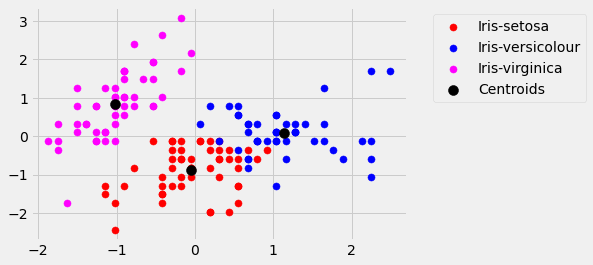

In [12]:
plot_clusters()